In [17]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for data processing and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline


In [19]:
# Load the weather data from the CSV file and set 'date_time' as the index
weather_df = pd.read_csv('kanpur (1).csv', parse_dates=['date_time'], index_col='date_time')

# Display the first 5 rows of the dataset to inspect the data
weather_df.head(5)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [21]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [23]:
weather_df.shape

(96432, 24)

In [25]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


In [27]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [29]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


In [31]:
weather_df_num.shape

(96432, 10)

In [33]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

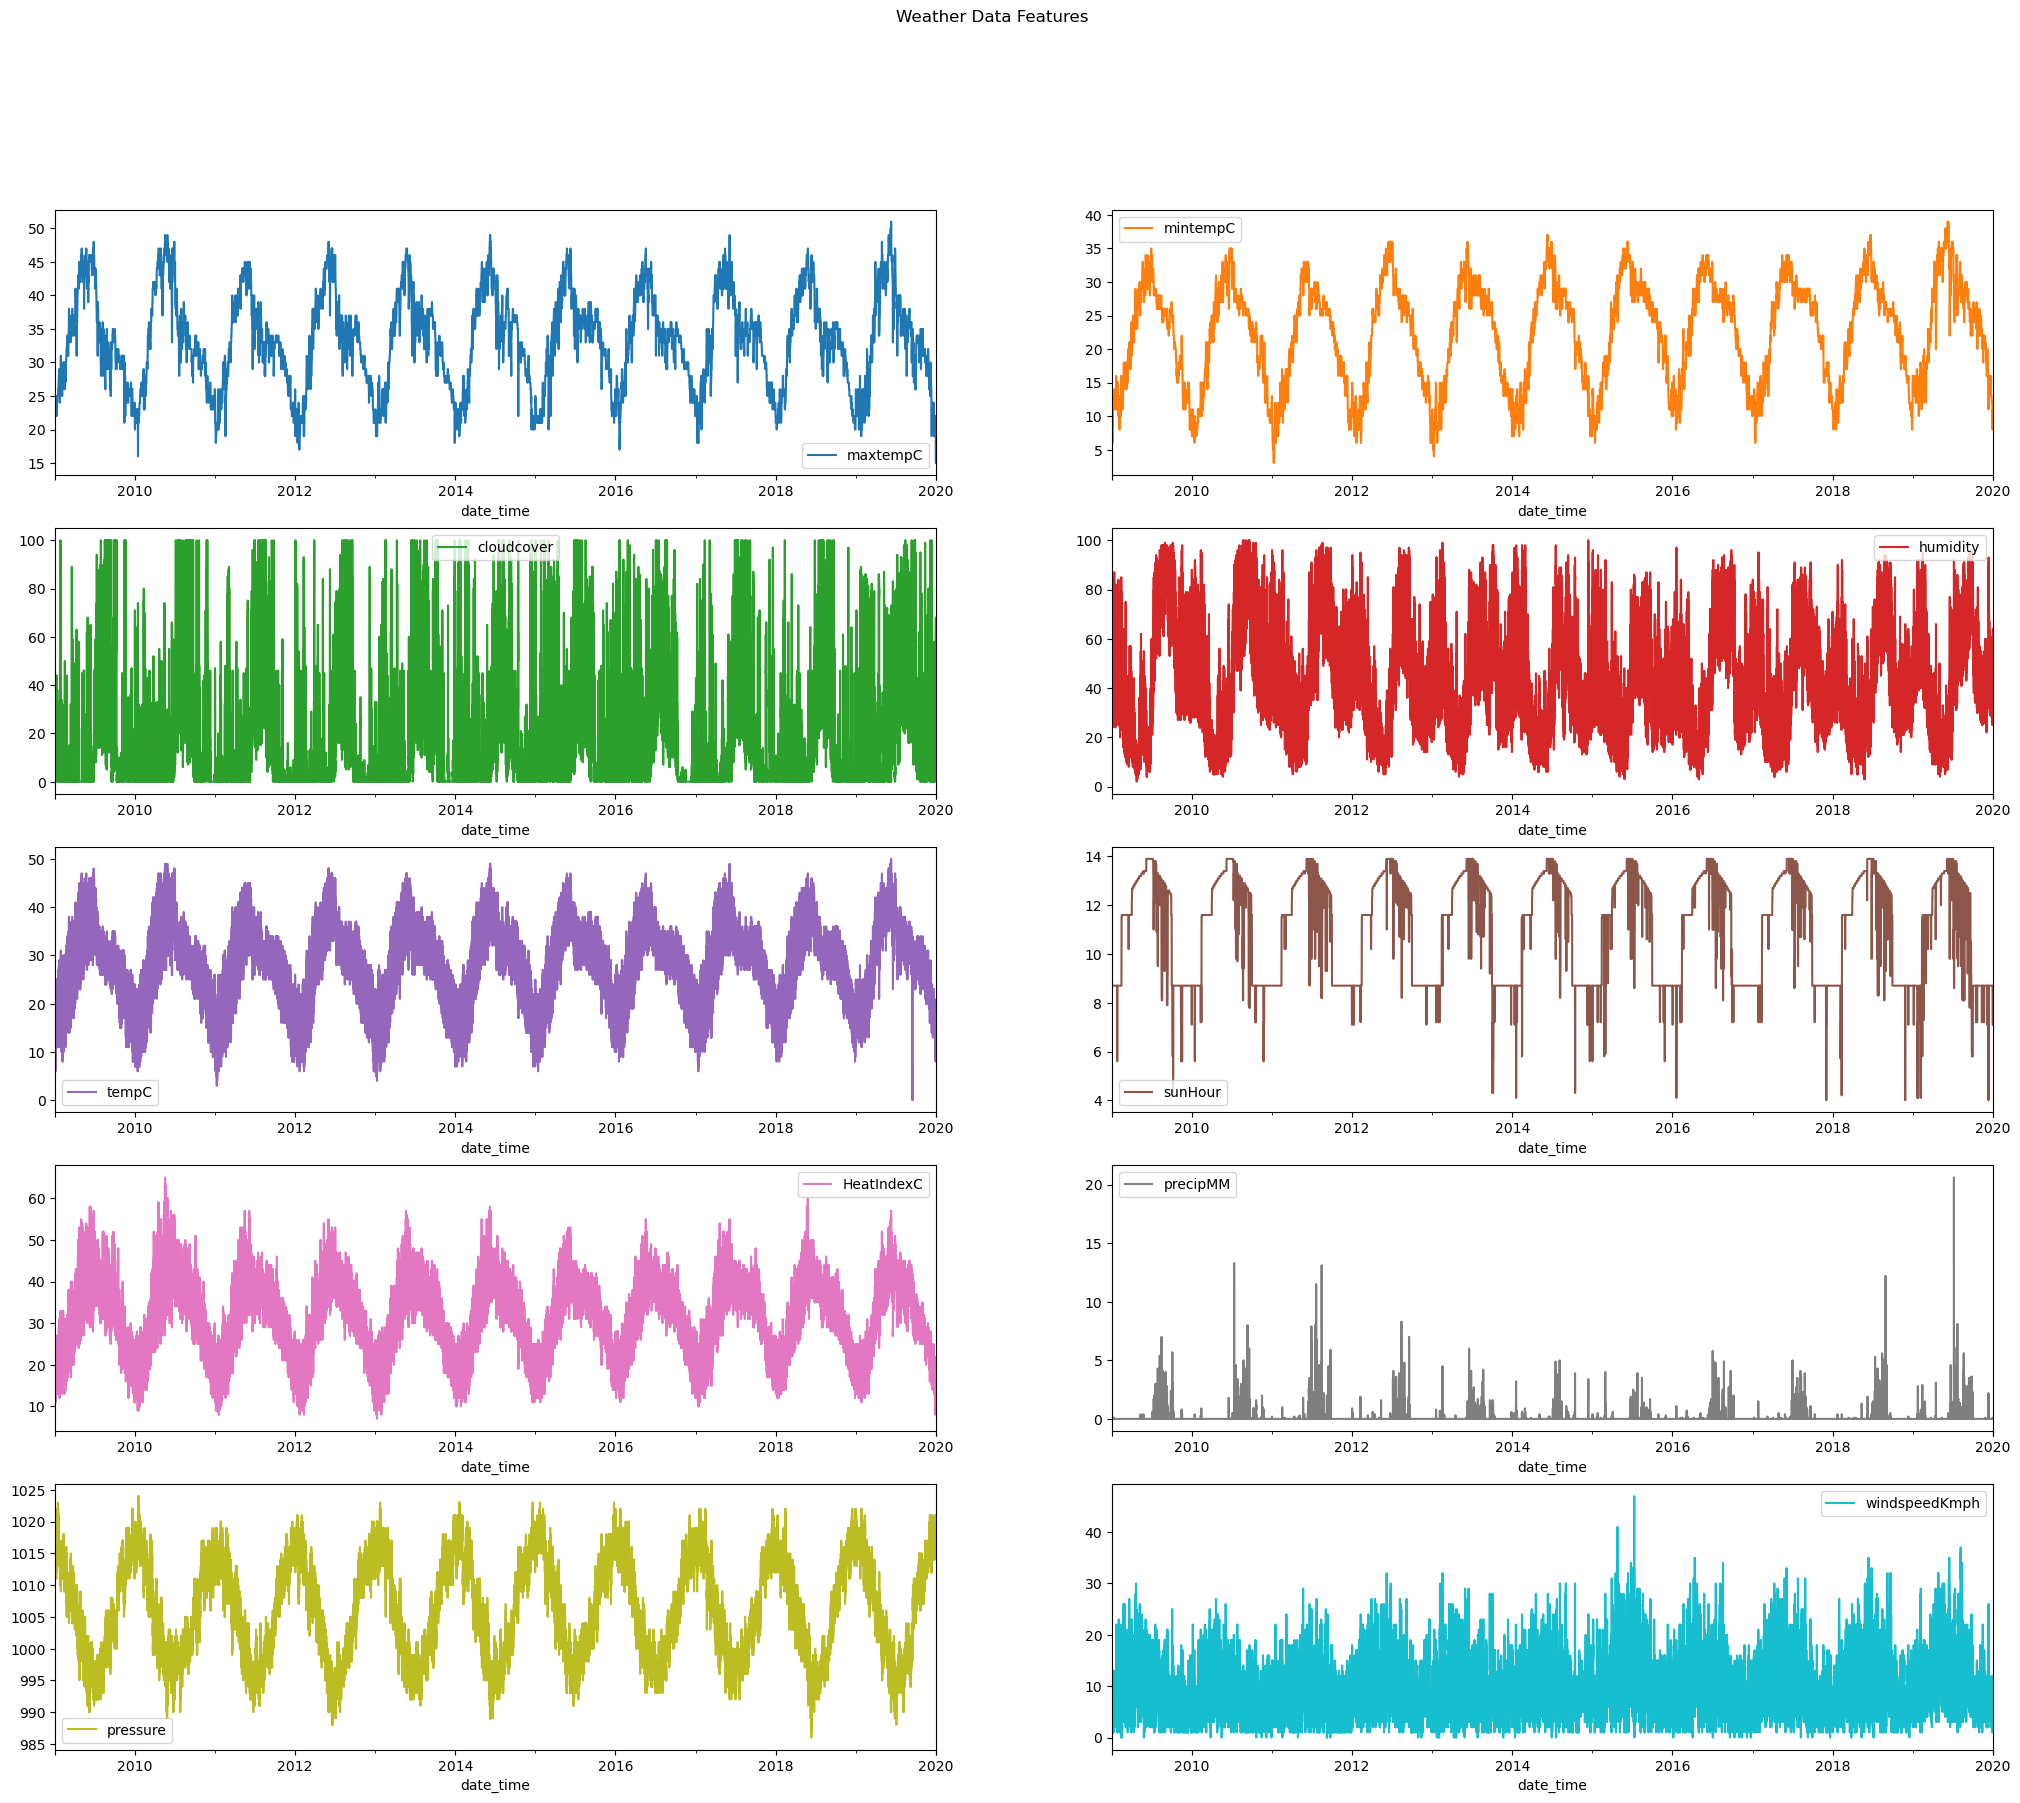

In [35]:
# Plot each column in the weather_df_num DataFrame as a separate subplot
weather_df_num.plot(
    subplots=True,              # Create a subplot for each column
    figsize=(25, 20),           # Set the figure size to 25x20 inches
    layout=(5, 2),              # Organize plots in 5 rows and 2 columns (you can adjust based on the number of columns)
    sharex=False,               # Do not share the x-axis among the plots
    sharey=False,               # Do not share the y-axis among the plots
    title='Weather Data Features'  # Add a title for the whole plot
)
plt.show()
+

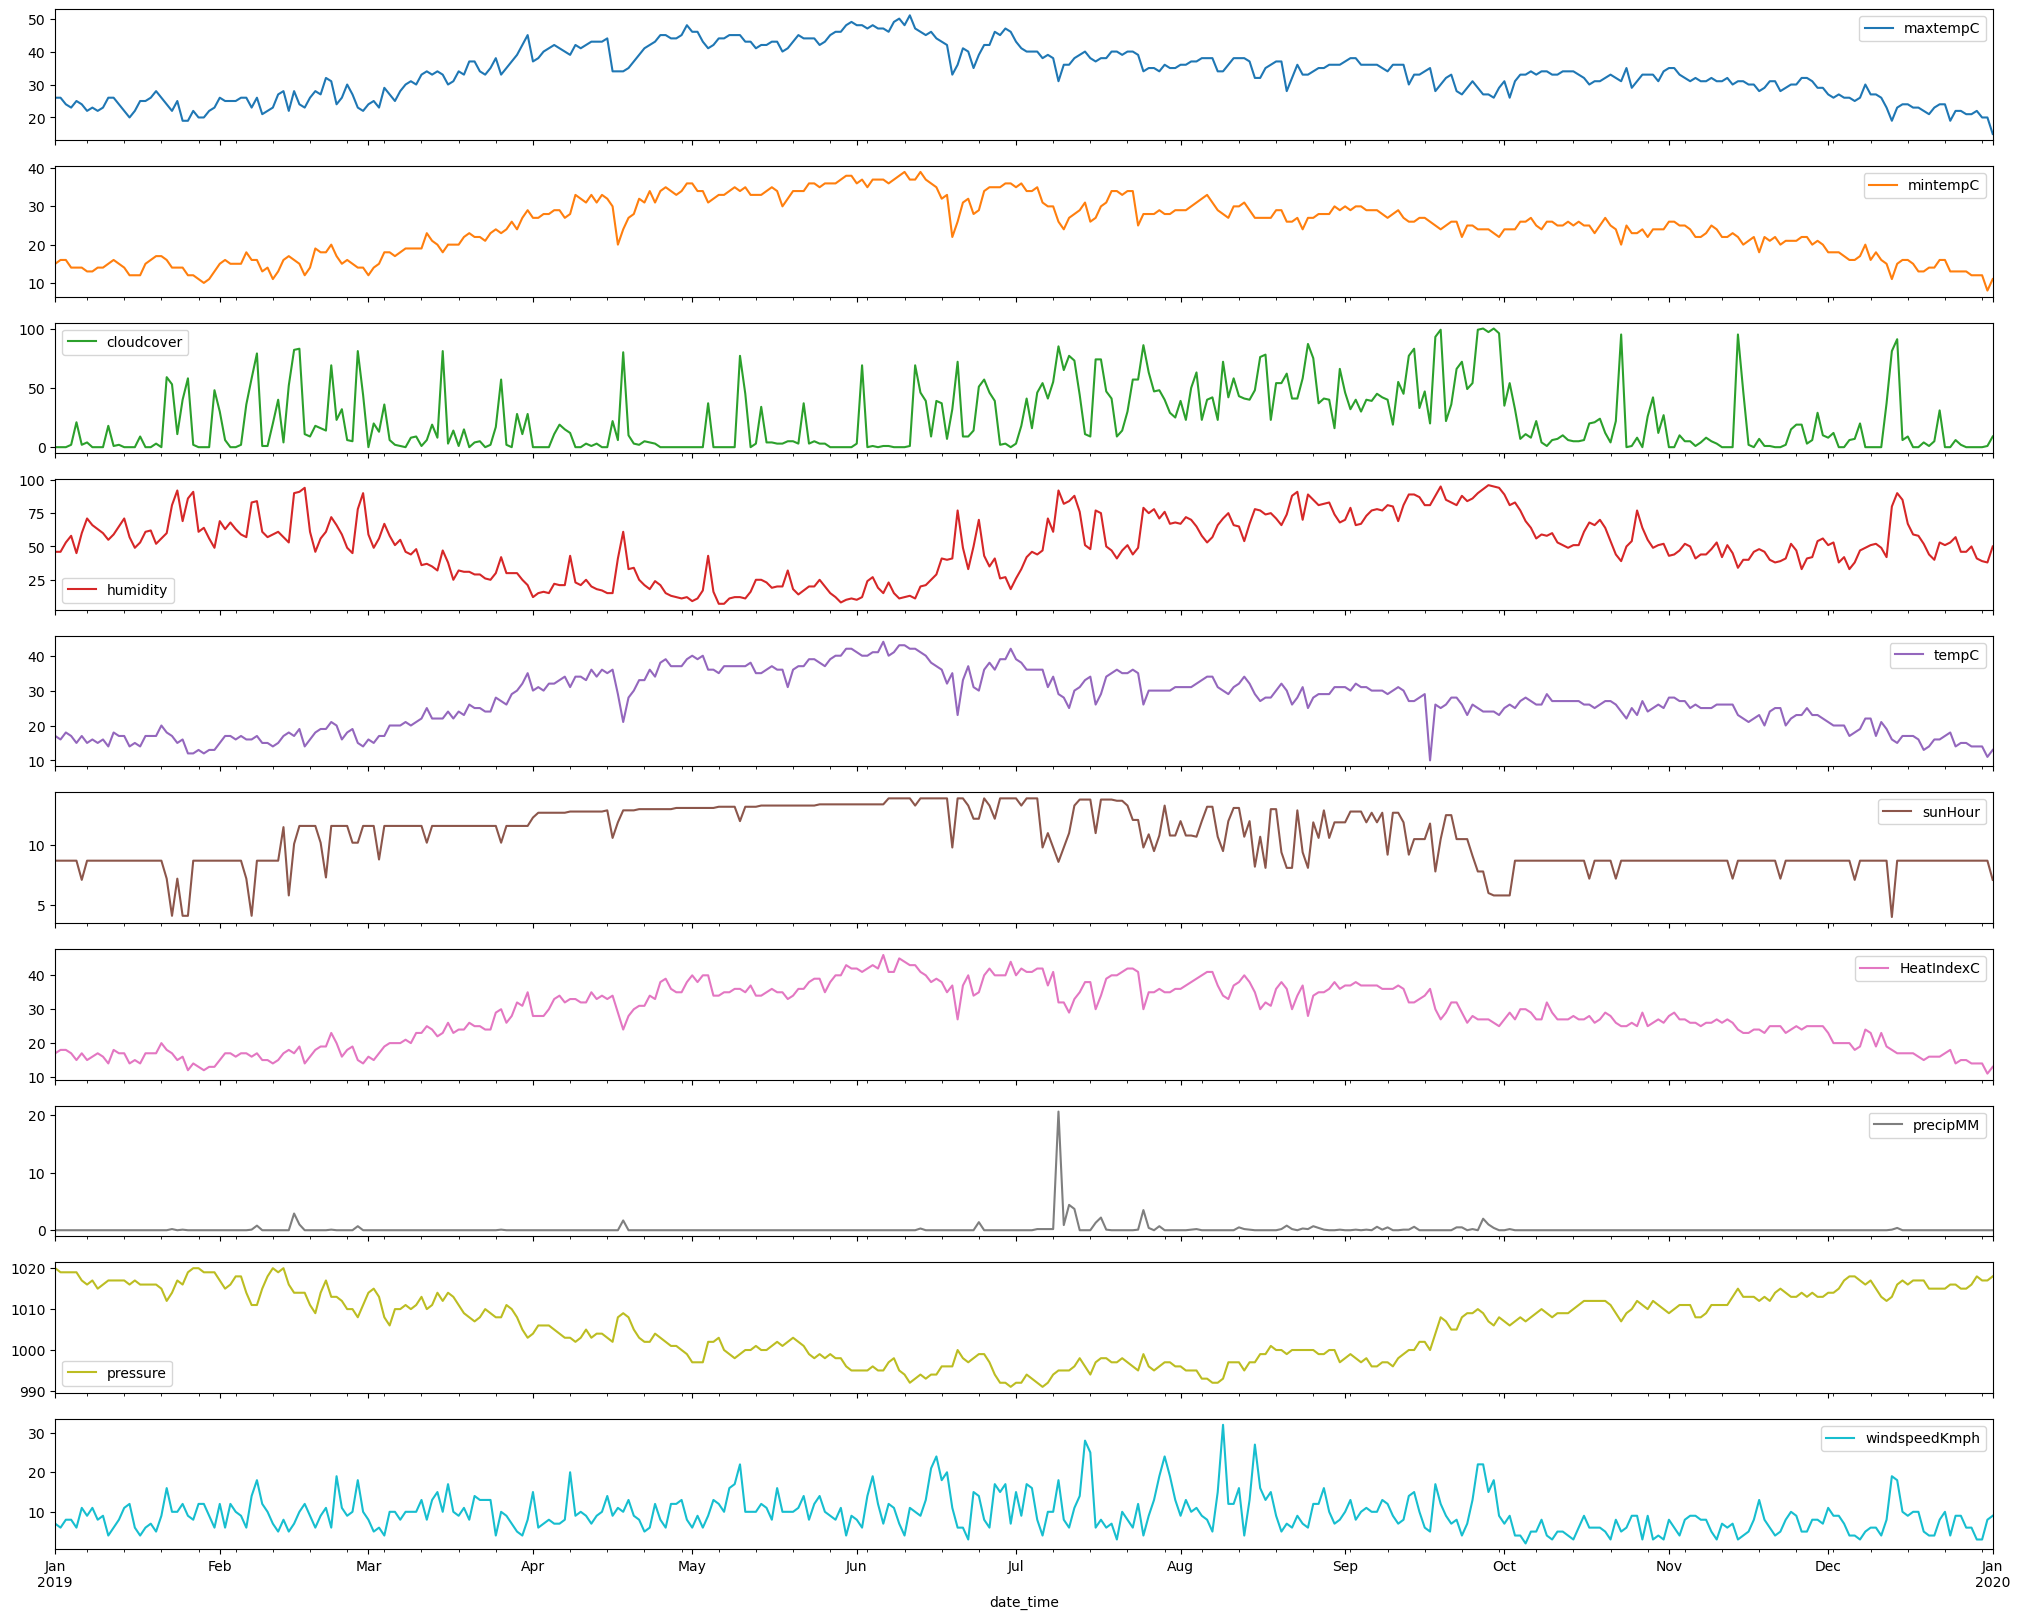

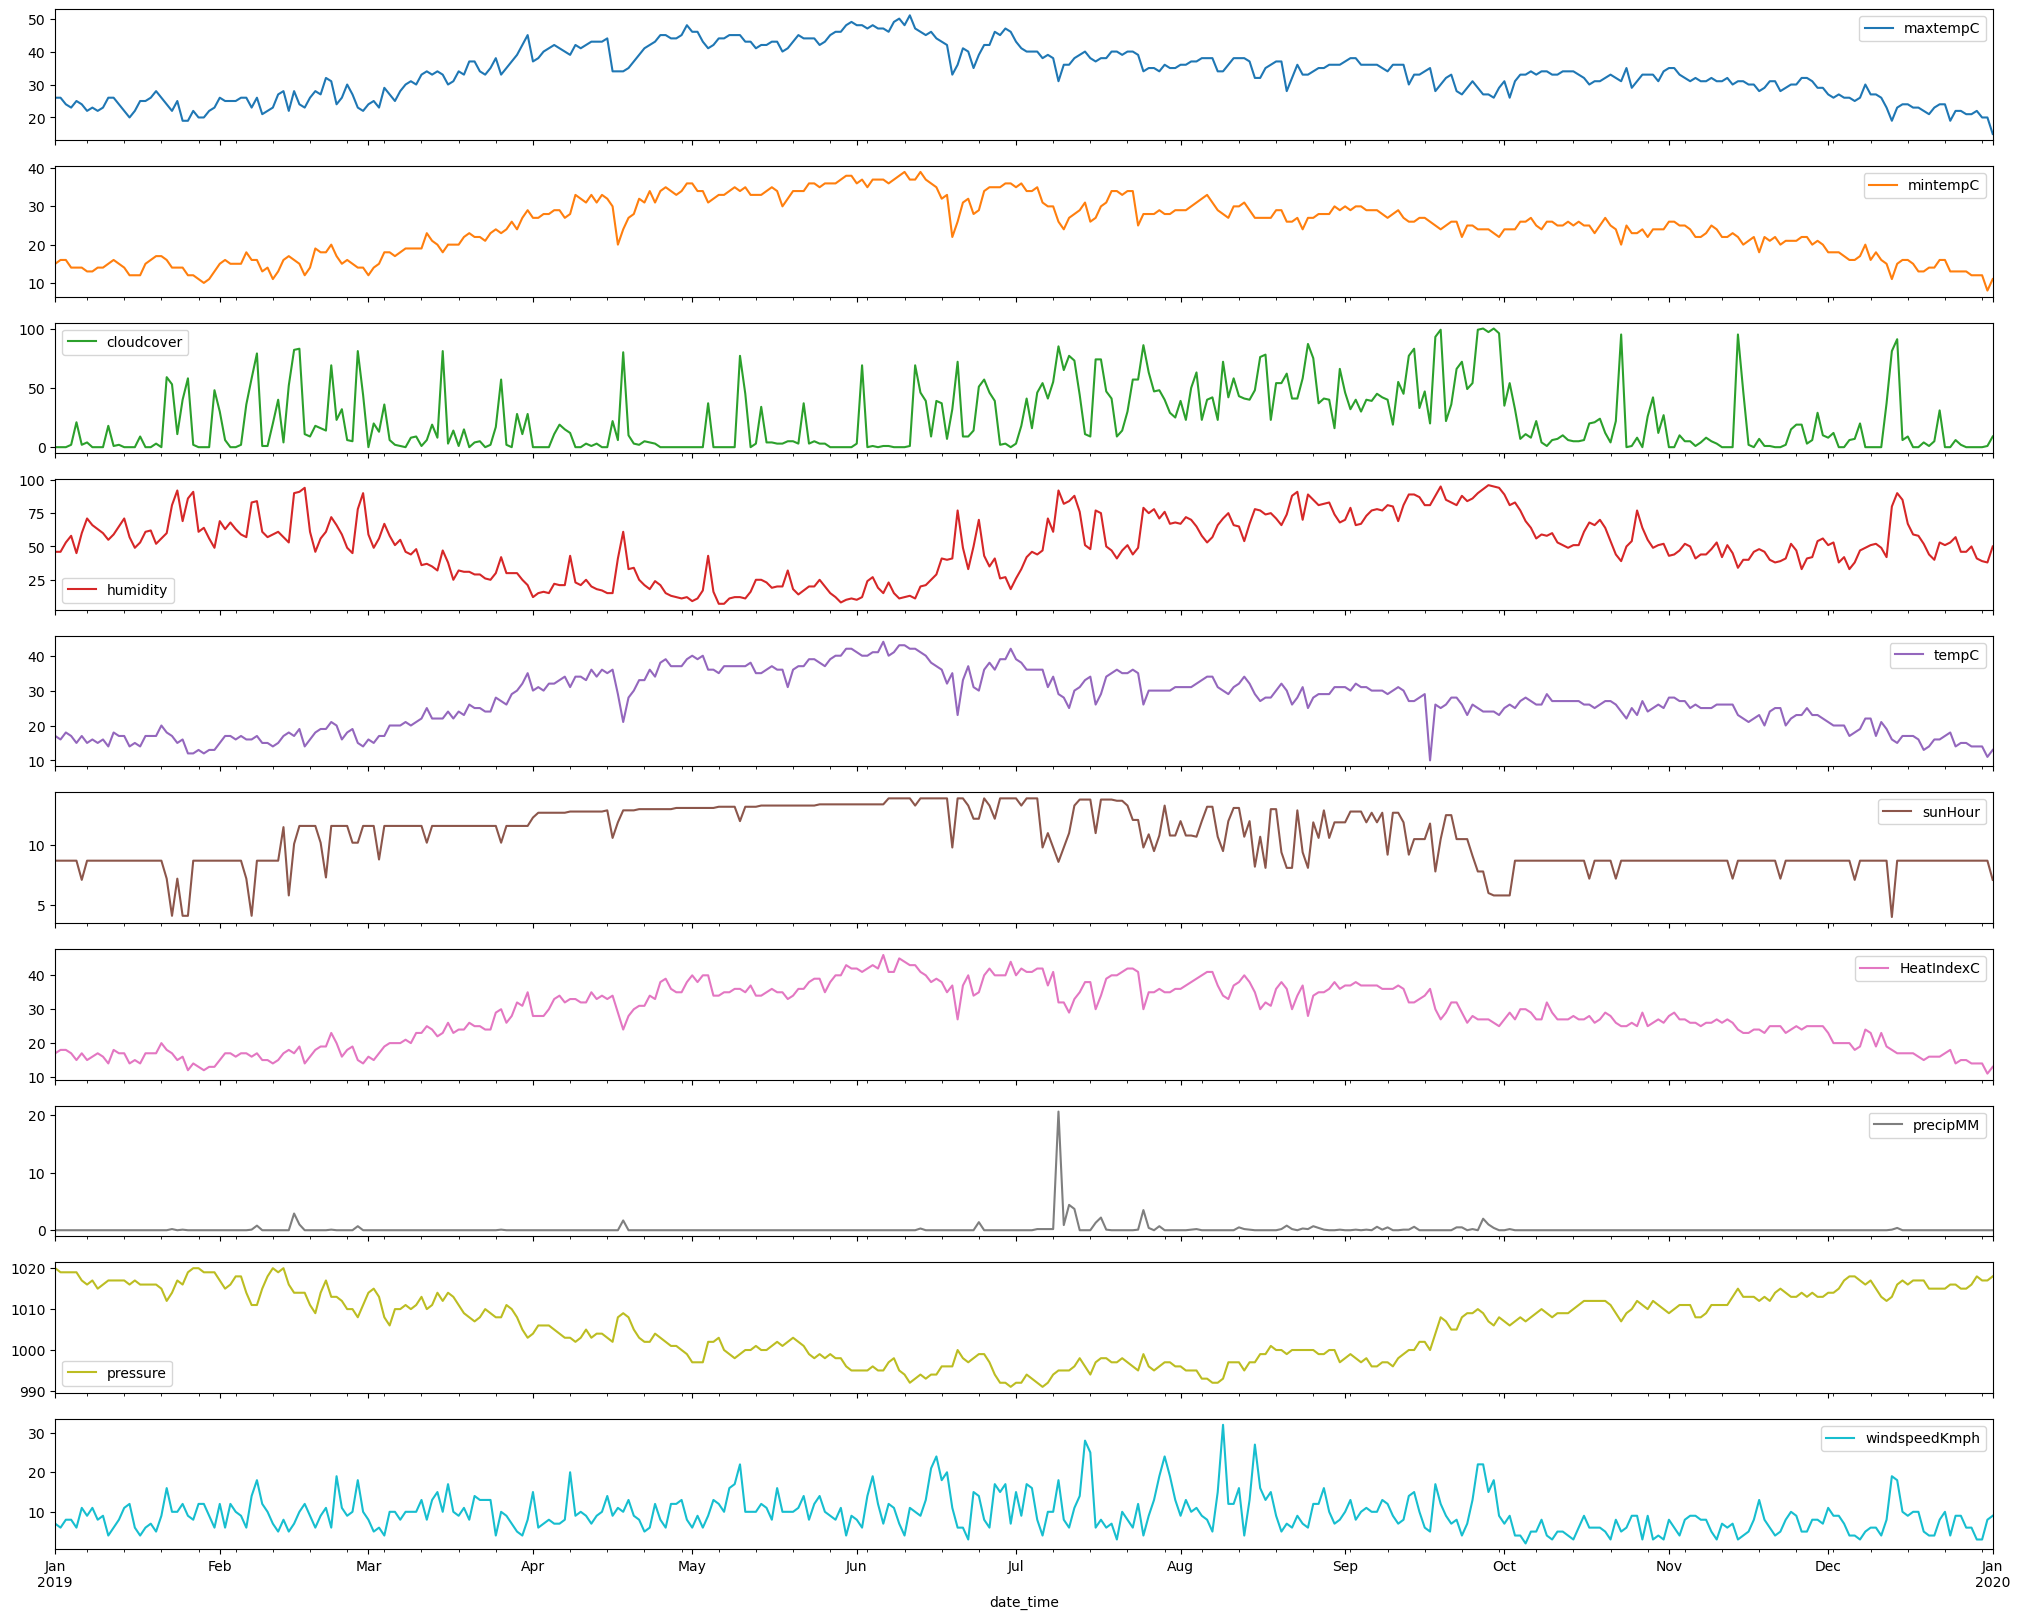

In [35]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25, 20))
plt.show()

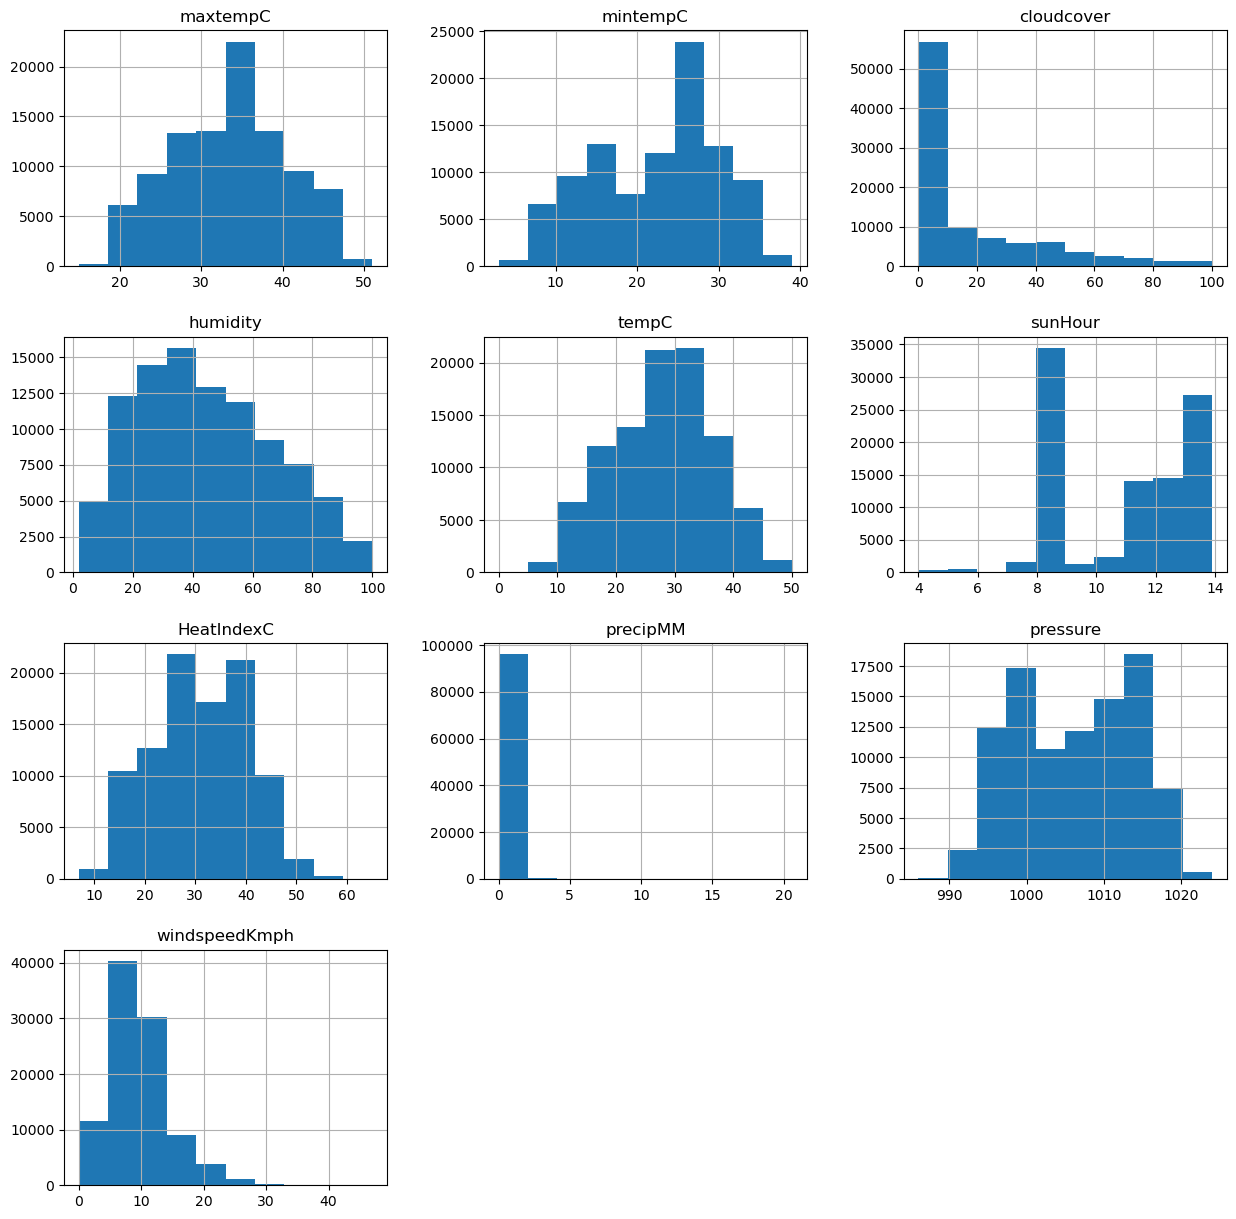

In [36]:

weather_df_num.hist(bins=10,figsize=(15,15))
plt.show()

In [37]:
weather_y = weather_df_num.pop("tempC")
print(weather_df_num.columns)

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')


In [38]:
weather_x = weather_df_num
     

In [39]:
print(weather_y)

date_time
2009-01-01 00:00:00    11
2009-01-01 01:00:00    11
2009-01-01 02:00:00    11
2009-01-01 03:00:00    10
2009-01-01 04:00:00    11
                       ..
2020-01-01 19:00:00    13
2020-01-01 20:00:00    13
2020-01-01 21:00:00    13
2020-01-01 22:00:00    13
2020-01-01 23:00:00    12
Name: tempC, Length: 96432, dtype: int64


In [53]:
print(weather_x)

                     maxtempC  mintempC  cloudcover  humidity  sunHour  \
date_time                                                                
2009-01-01 00:00:00        24        10          17        50      8.7   
2009-01-01 01:00:00        24        10          11        52      8.7   
2009-01-01 02:00:00        24        10           6        55      8.7   
2009-01-01 03:00:00        24        10           0        57      8.7   
2009-01-01 04:00:00        24        10           0        54      8.7   
...                       ...       ...         ...       ...      ...   
2020-01-01 19:00:00        15        11          53        61      7.1   
2020-01-01 20:00:00        15        11          39        61      7.1   
2020-01-01 21:00:00        15        11          25        62      7.1   
2020-01-01 22:00:00        15        11          26        63      7.1   
2020-01-01 23:00:00        15        11          27        64      7.1   

                     HeatIndexC  prec

In [40]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [41]:
train_X.shape

(77145, 9)

In [43]:
train_y.shape

(77145,)

In [51]:
train_y.head()

date_time
2012-03-13 07:00:00    22
2009-11-05 21:00:00    21
2017-10-11 22:00:00    30
2019-06-08 11:00:00    47
2019-03-06 05:00:00    18
Name: tempC, dtype: int64

In [53]:
weather_df_num = weather_df.loc[:, ['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 
                                     'sunHour', 'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph']]


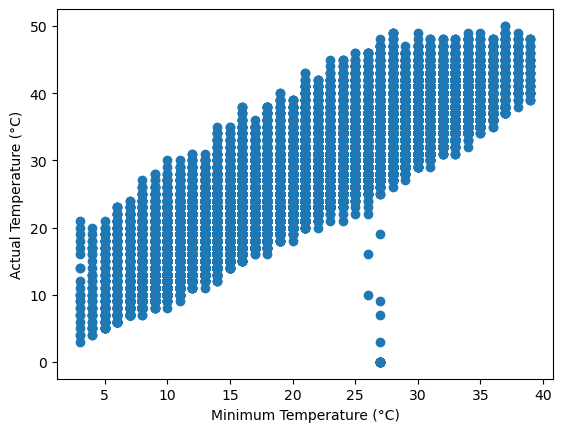

In [55]:
import matplotlib.pyplot as plt

# Create the scatter plot using your DataFrame (weather_df_num)
plt.scatter(weather_df_num["mintempC"], weather_df_num["tempC"])

# Add axis labels
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Actual Temperature (°C)")

# Show plot
plt.show()



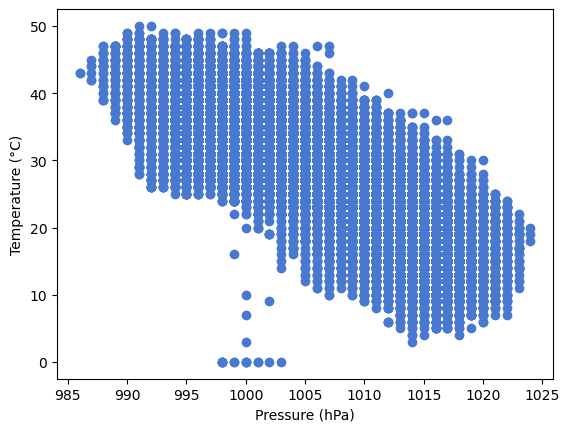

In [91]:
import matplotlib.pyplot as plt

# Create the scatter plot using weather_df_num
plt.scatter(weather_df_num["pressure"], weather_df_num["tempC"])

# Add axis labels
plt.xlabel("Pressure (hPa)")
plt.ylabel("Temperature (°C)")

# Show plot
plt.show()


In [101]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [103]:

prediction = model.predict(test_X)

In [105]:

#calculating error
np.mean(np.absolute(prediction-test_y))

1.200473579409679

In [107]:

print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.96


In [109]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.89,-0.89
2015-11-04 20:00:00,25,24.57,0.43
2015-09-21 09:00:00,34,35.08,-1.08
2017-02-16 11:00:00,28,25.22,2.78
2012-07-21 01:00:00,28,28.04,-0.04
...,...,...,...
2019-03-30 09:00:00,37,33.55,3.45
2015-11-12 12:00:00,32,30.36,1.64
2019-12-31 05:00:00,8,9.13,-1.13


In [111]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)
     

DecisionTreeRegressor(random_state=0)

In [113]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))
     

0.5630130830784121

In [115]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


In [125]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})
     

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.0,0.0
2015-11-04 20:00:00,25,24.0,1.0
2015-09-21 09:00:00,34,34.0,0.0
2017-02-16 11:00:00,28,27.0,1.0
2012-07-21 01:00:00,28,28.0,0.0
...,...,...,...
2019-03-30 09:00:00,37,32.0,5.0
2015-11-12 12:00:00,32,32.0,0.0
2019-12-31 05:00:00,8,9.0,-1.0


In [124]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)
     

RandomForestRegressor(max_depth=90, random_state=0)

In [130]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.4749165453503998

In [132]:
print('Variance score: %.2f' % regr.score(test_X, test_y))
     

Variance score: 0.99


In [134]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,33.92,0.08
2015-11-04 20:00:00,25,24.84,0.16
2015-09-21 09:00:00,34,34.25,-0.25
2017-02-16 11:00:00,28,27.00,1.00
2012-07-21 01:00:00,28,27.99,0.01
...,...,...,...
2019-03-30 09:00:00,37,32.79,4.21
2015-11-12 12:00:00,32,31.91,0.09
2019-12-31 05:00:00,8,8.81,-0.81


In [136]:
from sklearn.metrics import r2_score  # Add this import

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, prediction))


Mean absolute error: 1.20
Residual sum of squares (MSE): 2.51
R2-score: 0.96


In [138]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )
     

Mean absolute error: 0.56
Residual sum of squares (MSE): 1.12
R2-score: 0.98


In [140]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.47
Residual sum of squares (MSE): 0.63
R2-score: 0.99
